# M/L Commando Course, Cambridge 2018
## Session 0: Environment setup and iris classification
### Russell Moore
#### Based on the work of Guillermo Moncecchi, Diego Garat, Raúl Garreta

_This session introduces the student to the sklearn environment, numpy and pandas.  We introduce estimators and scalers. Uses the Iris flower dataset, introduced in 1936 by Sir Ronald Fisher, to perform binary and multi-class classification._

## Setting the environment

Start by importing numpy, scikit-learn, and pyplot, the Python libraries we will be using. Show the versions we will be using (in case you have problems running the notebooks).

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Import scikit-learn, numpy, scipy and pyplot

In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import sklearn
import IPython
import platform
    
print ('Python version:', platform.python_version())
print ('IPython version:', IPython.__version__)
print ('numpy version:', np.__version__)
print ('scikit-learn version:', sklearn.__version__)
print ('matplotlib version:', matplotlib.__version__)
    

Python version: 3.6.3
IPython version: 6.2.1
numpy version: 1.13.3
scikit-learn version: 0.19.1
matplotlib version: 2.1.0


## Load the Dataset

Every method implemented on scikit-learn assumes that data comes in a dataset. Scikit-learn includes a few well-known datasets. The [Iris flower dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) includes information about 150 instances from three different Iris flower species, including sepal and petal length and width. The natural task to solve using this dataset is to learn to guess the Iris species knowing the sepal and petal measures. Let's import the dataset:

In [3]:
from sklearn import datasets
iris = datasets.load_iris()
print(type(iris)) # rjm49 - what datatype is this then?


<class 'sklearn.utils.Bunch'>


The dataset includes 150 instances, with 4 attributes each. For each instance, we will also have a target class (in our case, the species). This class is a special attribute which we will aim to predict for new, previously unseen instances, given the remaining (known) attributes.

In [4]:
X_iris = iris.data
y_iris = iris.target
print(type(X_iris), X_iris.shape)
print(type(y_iris), y_iris.shape)

print ("\nshapes of arrays:", X_iris.shape, y_iris.shape) #shape is an attribute of numpy arrays


#rjm49 - let's check out what datatypes we're dealing with...
print("X entries are of data type:",X_iris.dtype) # <-- expecting continuous values here (floating point numbers)
print("y entries are of data type:",y_iris.dtype)# <-- expecting category index here (integer)
#numpy.ndarray types are NumPy n-dimensional arrays

print ('\nFeature names:{0}'.format(iris.feature_names))
print ('Target classes:{0}'.format(iris.target_names))

print ('\nFirst instance features:{0}'.format(X_iris[0]))
print(X_iris[0:5,:]) # <-- here we print the first 5 rows of X
print(y_iris[0:5]) # <-- here we print the first 5 items of y



<class 'numpy.ndarray'> (150, 4)
<class 'numpy.ndarray'> (150,)

shapes of arrays: (150, 4) (150,)
X entries are of data type: float64
y entries are of data type: int64

Feature names:['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target classes:['setosa' 'versicolor' 'virginica']

First instance features:[ 5.1  3.5  1.4  0.2]
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]
[0 0 0 0 0]


Before we continue, let's see how we can create a boolean array from a numpy array using a comparator.  This is useful as a "mask" for filtering rows or columns out of other numpy arrays, as we'll see later.

In [5]:
print((y_iris == 0))

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False]


Let us display each instance in a 2d-scatter plot, using first sepal measures, and then petal measures.

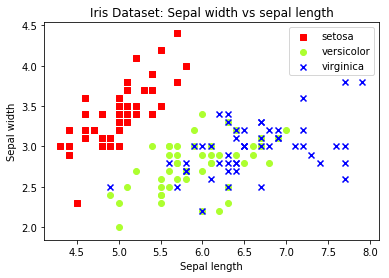

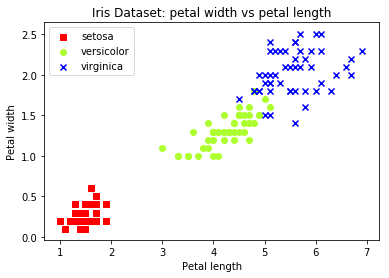

In [6]:
plt.figure('sepal')
colormarkers = [ ['red','s'], ['greenyellow','o'], ['blue','x']]
for i in range(len(colormarkers)):
    px = X_iris[:, 0][y_iris == i] #<-- selects all rows (:), first col (0), then filters where y_iris == i
    py = X_iris[:, 1][y_iris == i] #<-- selects all rows (:), first col (0), then filters where y_iris == i
    plt.scatter(px, py, c=colormarkers[i][0], marker=colormarkers[i][1])

plt.title('Iris Dataset: Sepal width vs sepal length')
plt.legend(iris.target_names)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.figure('petal')

for i in range(len(colormarkers)):
    px = X_iris[:, 2][y_iris == i]
    py = X_iris[:, 3][y_iris == i]
    plt.scatter(px, py, c=colormarkers[i][0], marker=colormarkers[i][1])

plt.title('Iris Dataset: petal width vs petal length')
plt.legend(iris.target_names)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.show()


## Supervised Learning: Classification

In 1936 Sir Ronald Fisher introduced the Iris dataset to the statistics world, using it to develop a _linear discriminant model_. What he did was to build a linear combination of the attributes that separates a species from the rest, that is, find a straight line similar to the one we suggested in the previous section.

**Task 1:** predict the species of an iris flower given the four sepal and length measures. For the moment, we will start using only two attributes, its sepal width and length. We will do this to ease visualization, but later we will use the four attributes, and see if performance improves. This is an instance of a **classification problem**, where we want to assign a label taken from a discrete set to an item according to its features.

The typical classification process roughly involves the following steps: 
- select your attributes, 
- build a model based on available data, and 
- evaluate your model’s performance on previously unseen data. 

To do this, before building our model we should separate training and testing data. Training data will be used to build the model, and testing data will be used to evaluate its performance.


### Separate training and testing sets

Our first step will be to separate the dataset into to separate sets, using 75% of the instances for training our classifier, and the remaining 25% for evaluating it (and, in this case, taking only two features, sepal width and length). We will also perform _feature scaling_: for each feature, calculate the average, subtract the mean value from the feature value, and divide the result by their standard deviation. After scaling, each feature will have a zero average, with a standard deviation of one. This standardization of values (which does not change their distribution, as you could verify by plotting the X values before and after scaling) is a common requirement of machine learning methods, to avoid that features with large values may weight too much on the final results.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Create dataset with only the first two attributes
X, y = X_iris[:, [0,1]], y_iris
# Test set will be the 25% taken randomly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)
    
# Standarize the features
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)



Check that, after scaling, the mean is 0 and the standard deviation is 1 (this should be exact in the training set, but only approximated in the testing set, because we used the training set media and standard deviation):

In [11]:
print ('Training set mean:{:.2f} and standard deviation:{:.2f}'.format(np.average(X_train),np.std(X_train)))
print ('Testing set mean:{:.2f} and standard deviation:{:.2f}'.format(np.average(X_test),np.std(X_test)))


Training set mean:0.00 and standard deviation:1.00
Testing set mean:0.13 and standard deviation:0.71


Display the training data, after scaling.

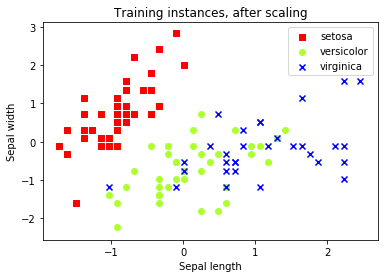

In [12]:
colormarkers = [ ['red','s'], ['greenyellow','o'], ['blue','x']]
plt.figure('Training Data')
for i in range(len(colormarkers)):
    xs = X_train[:, 0][y_train == i]
    ys = X_train[:, 1][y_train == i]
    plt.scatter(xs, ys, c=colormarkers[i][0], marker=colormarkers[i][1])

plt.title('Training instances, after scaling')
plt.legend(iris.target_names)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()


### A linear, binary classifier

To start, let's transform the problem to a binary classification task: we will only want to distinguish setosa flowers from the rest (it seems easy, according to the plot). To do this, we will just collapse all non-setosa targets into the same class (later we will come back to the three-class original problem)

In [13]:
import copy 
y_train_setosa = copy.copy(y_train) # <-- python newbies need to understand copy.copy()!
# Every instance of 1 and 2 in the training set will set to 1
y_train_setosa[y_train_setosa > 0]=1
y_test_setosa = copy.copy(y_test)
y_test_setosa[y_test_setosa > 0]=1

print ('Old training target classes:\n{0}'.format(y_train))

print ('New training target classes:\n{0}'.format(y_train_setosa))


Old training target classes:
[1 0 1 1 1 0 0 1 0 2 0 0 1 2 0 1 2 2 1 1 0 0 2 0 0 2 1 1 2 2 2 2 0 0 1 1 0
 1 2 1 2 0 2 0 1 0 2 1 0 2 2 0 0 2 0 0 0 2 2 0 1 0 1 0 1 1 1 1 1 0 1 0 1 2
 0 0 0 0 2 2 0 1 1 2 1 0 0 1 1 1 0 1 1 0 2 2 2 1 2 0 1 0 0 0 2 1 2 1 2 1 2
 0]
New training target classes:
[1 0 1 1 1 0 0 1 0 1 0 0 1 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0
 1 1 1 1 0 1 0 1 0 1 1 0 1 1 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 1 1 0 1 0 1 1
 0 0 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1
 0]


Our first classifier will be a linear one. 

Linear classification models have been very well studied through many years, and the are a lot of different methods with actually very different approaches for building the separating hyperplane.  We will use the `LogisticRegression` classifier, which is simple and quick.  The technique was invented by Cambridge Mathematician David Cox in 1958.


Every classifier in scikit-learn is created the same way: calling a method with the classifier's configurable hyperparameters to create an instance of the classifier. In this case, we just call the constructor with the default (empty brackets) parameters.

In [15]:
from sklearn import linear_model 
#clf = linear_model.SGDClassifier(loss='log', random_state=42, fit_intercept=True)
clf = linear_model.LogisticRegression()
print (clf)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


Note that the classifier includes several parameters. Usually, scikit-learn specifies default values for every parameter. But be aware that it is not a good idea to keep it with their default values.  Normally we would undergo a process of _parameter tuning_ to find the optimal parameters.

Now, we just call the `fit` method to train the classifier (i.e., build a model we will later use), based on the available training data. In our case, the trainig setosa set.


In [16]:
clf.fit(X_train, y_train_setosa)    

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

How does our model look? Well, since we are building a linear classifier, our model is a... line. We can show its coefficients:

In [17]:
print (clf.coef_,clf.intercept_)


[[ 2.80167608 -2.10437613]] [ 1.28270304]


... and we can draw the decision boundary using pyplot:

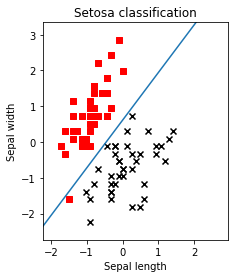

In [18]:
x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
xs = np.arange(x_min, x_max, 0.5)
fig,axes = plt.subplots()
axes.set_aspect('equal')
axes.set_title('Setosa classification')
axes.set_xlabel('Sepal length')
axes.set_ylabel('Sepal width')
axes.set_xlim(x_min, x_max)
axes.set_ylim(y_min, y_max)
plt.sca(axes)
plt.scatter(X_train[:, 0][y_train == 0], X_train[:, 1][y_train == 0], c='red', marker='s')
plt.scatter(X_train[:, 0][y_train == 1], X_train[:, 1][y_train == 1], c='black', marker='x')
ys = (-clf.intercept_[0]- xs * clf.coef_[0, 0]) / clf.coef_[0, 1]
plt.plot(xs, ys) #, hold=True)
plt.show()

The blue line is our decision boundary. Whenever $((30.97 \times sepal\_length) - (17.82 \times sepal\_width) - 17.34) \gt 0$, we're looking at an iris setosa (class 0). 

### Prediction

Now, the really useful part: when we have a new flower, we just have to get its petal width and length and call the `predict` method of the classifier on the new instance. _This works the same way no matter the classifier we are using or the method we used to build it_

In [19]:
#rjm49 - I've separated out these steps for clearer reading
new_flower = [[4.7, 3.1]]
scaled = scaler.transform(new_flower)
print("scaled this new instance to match the range of the others:", scaled)
prediction = clf.predict(scaled)
print ('If the flower has 4.7 petal width and 3.1 petal length, predicted class is {}, so a {}'.format(
        prediction, iris.target_names[prediction]))

predict_prob = clf.predict_proba(scaled)
print("Class probabilities are {}".format(predict_prob))

scaled this new instance to match the range of the others: [[-1.25950146  0.09442168]]
If the flower has 4.7 petal width and 3.1 petal length, predicted class is [0], so a ['setosa']
Class probabilities are [[ 0.9201738  0.0798262]]


Note that we first scaled the new instance, then applied the `predict` method, and used the result to lookup into the iris target names arrays. 

In [20]:
from sklearn import metrics
y_pred = clf.predict(X_test)
print (metrics.classification_report(y_test_setosa, y_pred, target_names=['setosa','other']))


             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00         8
      other       1.00      1.00      1.00        30

avg / total       1.00      1.00      1.00        38



### Back to the original three-class problem

Now, do the training using the three original classes. Using scikit-learn this is simple: we do exactly the same procedure, using the original three target classes:

In [21]:
#clf2 = linear_model.SGDClassifier(loss='log', random_state=33)
#clf2 = svm.LinearSVC()
clf2 = linear_model.LogisticRegression(solver="newton-cg")
clf2.fit(X_train, y_train) 
print ("number of classes is:", len(clf2.coef_))

number of classes is: 3


Now we have _three_ decision curves... scikit-learn has simply converted the problem into three one-versus-all binary classifiers. Note that Class 0 is linearly separable, while Class 1 and Class 2 are not

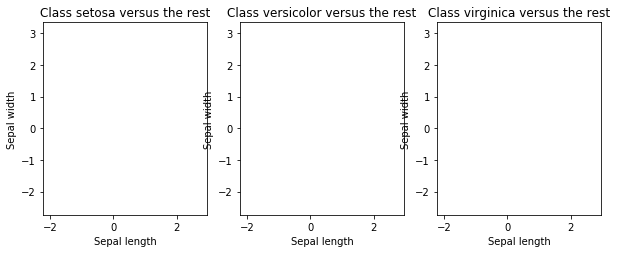

In [22]:
x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
xs = np.arange(x_min,x_max,0.5)
fig, axes = plt.subplots(1,3)
fig.set_size_inches(10,6)
for i in [0,1,2]: # <-- for each class of flower...
    flower_name = iris.target_names[i]
    axes[i].set_aspect('equal')
    axes[i].set_title('Class '+ flower_name + ' versus the rest')
    axes[i].set_xlabel('Sepal length')
    axes[i].set_ylabel('Sepal width')
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_ylim(y_min, y_max)
    plt.sca(axes[i])
    ys=(-clf2.intercept_[i]-xs*clf2.coef_[i,0])/clf2.coef_[i,1]
    # add a plot using xs, ys to show decision boundary
    for j in [0,1,2]:
        px = X_train[:, 0][y_train == j]
        py = X_train[:, 1][y_train == j]
        color = colormarkers[j][0] if j==i else 'black'
        marker = 'o' if j==i else 'x'
        # add a scatter plot to show the sample points

plt.show()


Let us evaluate on the previous instance to find the three-class prediction. Scikit-learn tries the three classifiers. 

In [23]:
raw_flower = [[4.7, 3.1]] # try some other values here to see what you get
flower = scaler.transform(raw_flower)
print("setosa score",clf2.decision_function(flower)[0][0])
print("versicolor score", clf2.decision_function(flower)[0][1])
print("virginica score", clf2.decision_function(flower)[0][2])

pred = clf2.predict(flower)
print(pred)

setosa score 2.38381561986
versicolor score -1.12990170314
virginica score -4.06346668553
[0]


The `decision_function` method tell us the classifier scores (in our case, the left side of the decision boundary inequality). In our example, the first classifier says the flower is a setosa (we have a score greater than zero), and it is not a versicolor nor a virginica. Easy. What if we had two positive values? In our case, the greatest score will be the point which is further away from the decision line. 

### Evaluating the classifier

The performance of an estimator is a measure of its effectiveness. The most obvious performance measure is called _accuracy_: given a classifier and a set of instances, it simply measures the proportion of instances correctly classified by the classifier. We can, for example, use the instances in the training set and calculate the accuracy of our classifier when predicting their target classes. Scikit-learn includes a `metrics` module that implements this (and many others) performance metric.

In [25]:
from sklearn import metrics
y_train_pred = clf2.predict(X_train)
print ('Accuracy on the training set:{:.2f}'.format(metrics.accuracy_score(y_train, y_train_pred)))


Accuracy on the training set:0.81


This means that our classifier correctly predicts 83% of the instances in the training set. But this is actually a bad idea.  The problem with the evaluating on the training set is that you have built your model using this data, and it is possible that your model adjusts actually very well to them, but performs poorly in previously unseen data (which is its ultimate purpose). This phenomenon is called overfitting, and you will see it once and again while you read this book. If you measure on your training data, you will never detect overfitting. So, _never ever_ measure on your training data. 

Remember we separated a portion of the training set? Now it is time to use it: since it was not used for training, we expect it to give us and idead of how well our classifier performs on previously unseen data.

In [26]:
y_pred = clf2.predict(X_test)
print ('Accuracy on the test set:{:.2f}'.format(metrics.accuracy_score(y_test, y_pred)))


Accuracy on the test set:0.68


Generally, accuracy on the testing set is lower than the accuracy on the training set, since the model is actually modeling the training set, not the testing set.

One of the problems with accuracy is that does not reflect well how our model performs on each different target class. For example, we know that our classifier works very well identifying setosa species, but will probably fail when separating the other two species. If we could measure this, we could get hints for improving performance, changing the method or the features. 

A very useful tool when facing multi-class problems is the confusion matrix. This matrix includes, in element (r,c) the number of instances of class r that were predicted to be in class c. A good classifier will accumulate the values on the confusion matrix diagonal, where correctly classified instances belong. Having the original and predicted classes, we can easily print the confusion matrix:

In [27]:
print (metrics.confusion_matrix(y_test, y_pred))


[[ 8  0  0]
 [ 0  6  5]
 [ 0  7 12]]


To read the classification matrix, just remember the definition: the “8” on row 2, column 3, means that eight instances if class 1 where predicted to be in class 2. Our classifier is never wrong in our evaluation set when it classifies class zero (setosa) flowers.  However, when it faces classes one and two (versicolor and virginica), it confuses them. The confusion matrix gives us useful information to know what kind of errors the classifier is making.

Accuracy on the test set is a good performance measure when the number of instances of each class is similar, i.e., we have a uniform distribution of classes. However, consider that 99 percent of your instances belong to just one class (you have a skewed dataset): a classifier that always predicts this  majority class will have an excellent performance in terms of accuracy, despite the fact that it is an extremely naive method (and that it will surely fail in the “difficult” 1% cases).

Within scikit-learn, there are several evaluation functions; we will show three popular ones: precision, recall, and F1-score (or f-measure).

In [28]:
print (metrics.classification_report(y_test, y_pred, target_names=iris.target_names))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00         8
 versicolor       0.46      0.55      0.50        11
  virginica       0.71      0.63      0.67        19

avg / total       0.70      0.68      0.69        38



- Precision: what proportion of instances predicted to be in some class C, are actually in C.
- Recall: what proportion of all instances in class C were correctly predicted.
- F1-score is the harmonic mean of precision and recall, and tries to combine both in a single number (namely $F_1 = \frac{2pr}{p+r}$).

### Using the four flower attributes

To end with this classification section, we will repeat the whole process, this time using the four original attributes, and check if performance improves.

In [ ]:
# Test set will be the 25% taken randomly
X_train4, X_test4, y_train4, y_test4 = train_test_split(X_iris, y_iris, test_size=0.25, random_state=33) # try using a different train/test split
    
# Standarize the features
scaler = preprocessing.StandardScaler()
scaler = None # fit the scaler on the training set
X_train4 = scaler.transform(X_train4)
X_test4 = scaler.transform(X_test4)

# Build the classifier
clf3 = None # instantiate your own classifier here
clf3.fit(X_train4, y_train4) 

# Evaluate the classifier on the evaluation set
y_pred4 = None # insert code here to predict y values
print (metrics.classification_report(y_test4, y_pred4, target_names=iris.target_names))


## Summary

To end with this introductory notebook, we will summarise the main common steps to apply a supervised learning method in scikit-learn:
-	Get your dataset. Select your learning features, and create a 2D data array, with one column for each feature, and one row for each learning instance. Every feature is represented by a real number. Your data probably does not look like that in its original format. In the real world, this the preprocessing stage usually takes a lot of time. In the next chapters we will show several examples of preprocessing different types of data. 
-	Create an instance of an estimator (a classifier or a regressor). In scikit-learn, this corresponds to an object that implements the methods `fit(X,y)` and `predict(T)`. This estimator takes as arguments the model’s parameters. You can set these parameters by hand, or using tools for model selection (we will address this later in this book).
-	Separate you training and testing sets (or, alternatively, use cross-validation)
-	Build the model using the `fit(X,y)` method, being X your training data, and y the corresponding target class. 
-	Evaluate you estimator on the testing data, using the `predict(T)` method, where T is your test dataset.
-	Compare your results with the original target classes, using one of the several measures in the metrics module.

The previous steps are only an overview: scikit-learn offers several additional methods implementing different machine learning operations (such as dimensionality reduction, clustering, or semi-supervised learning), and many dataset transformation methods. 